In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()



In [4]:
# Load the example flights dataset and conver to long-form
key_word = "taco"
restaurant_df = pd.read_csv("drop_duplicates/{}_drop_duplicates.csv".format(key_word))
restaurant_df.fillna(0, inplace=True)
restaurant_df.head()


,Address,ID(Google),Name,Price_Level(Google),Rating(Google),Zip
0,"580 Old San Antonio Rd, Buda, TX 78610, USA",b3707c8748e2ffed8f2fb3deb33b2f259f42949e,Taco Bell,1.0,3.8,78610.0
1,"14500 I-35, Buda, TX 78610, USA",116f01ba1a17bdcfeec9eb5992577724d859c1ed,Abby's Mexican Food,0.0,4.4,78610.0
2,"108 N Main St, Buda, TX 78610, United States",9f1fa5eb3708d8551c9c6ca1e965f8c92360269a,Casa Alde,0.0,4.2,78610.0
3,"9900 S Interstate 35 Frontage Rd. #100, Austin...",d42a1e765dcd63817fc0b5009971239b93fc4c6b,Amaya's Taco Village,1.0,4.0,78748.0
4,"12510, FM1625, Buda, TX 78610, United States",fcc7714bc65400525fdd75ccc9594571c4b6368d,Jay's Tacos,0.0,0.0,78610.0


In [5]:
groupby_pricelevel = restaurant_df.groupby(["Zip", "Price_Level(Google)"])
df_byprice = groupby_pricelevel.count()
df_byprice.head()

Address  ID(Google)  Name  Rating(Google)
Zip     Price_Level(Google)                                           
0.0     1.0                        1           1     1               1
78610.0 0.0                        3           3     3               3
        1.0                        3           3     3               3
        2.0                        1           1     1               1
78613.0 0.0                        8           8     8               8

In [6]:
type(df_byprice)

pandas.core.frame.DataFrame

In [7]:
df_byprice=df_byprice[['Address']]

df_byprice.head()

Address
Zip     Price_Level(Google)         
0.0     1.0                        1
78610.0 0.0                        3
        1.0                        3
        2.0                        1
78613.0 0.0                        8

In [8]:
# reindexed_dataframe = df_byprice.reset_index(level=level_0)
# reindexed_dataframe.head()


In [9]:
df_byprice.rename(columns={"Address": "Restaurant"}, inplace=True)
# df_new = df_byprice.reset_index(level='Price_Level(Google)')
df_new = df_byprice.unstack(level='Zip')
# df_new.head()
df_new.fillna(0, inplace=True)
df_new1 = df_new.astype(int)
# df_new1.transpose()
df_new1.head()
# df_new1.columns
df_new1.columns=df_new1.columns.droplevel()

df_new1

Zip,0.0,78610.0,78613.0,78617.0,78620.0,78640.0,78641.0,78652.0,78653.0,78660.0,...,78749.0,78750.0,78751.0,78752.0,78753.0,78754.0,78756.0,78757.0,78758.0,78759.0
Price_Level(Google),,,,,,,,,,,,,,,,,,,,,
0.0,0,3,8,8,0,0,3,1,4,7,...,0,1,4,12,11,0,2,2,5,4
1.0,1,3,6,0,1,2,1,0,1,5,...,3,3,3,2,4,1,8,6,6,4
2.0,0,1,8,0,1,0,1,1,3,5,...,3,2,3,1,4,1,4,8,3,7
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [10]:
df_new1.index

Float64Index([0.0, 1.0, 2.0, 3.0], dtype='float64', name='Price_Level(Google)')

In [11]:
for index, row in df_new1.iterrows():
    if index == 4.0:
        df_new1 = df_new1.drop([4.0])
df_new1

Zip,0.0,78610.0,78613.0,78617.0,78620.0,78640.0,78641.0,78652.0,78653.0,78660.0,...,78749.0,78750.0,78751.0,78752.0,78753.0,78754.0,78756.0,78757.0,78758.0,78759.0
Price_Level(Google),,,,,,,,,,,,,,,,,,,,,
0.0,0,3,8,8,0,0,3,1,4,7,...,0,1,4,12,11,0,2,2,5,4
1.0,1,3,6,0,1,2,1,0,1,5,...,3,3,3,2,4,1,8,6,6,4
2.0,0,1,8,0,1,0,1,1,3,5,...,3,2,3,1,4,1,4,8,3,7
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [12]:
df_new1 = df_new1.append(df_new1.sum(numeric_only=True), ignore_index=True)

In [13]:
df_new1

Zip,0.0,78610.0,78613.0,78617.0,78620.0,78640.0,78641.0,78652.0,78653.0,78660.0,...,78749.0,78750.0,78751.0,78752.0,78753.0,78754.0,78756.0,78757.0,78758.0,78759.0
0,0,3,8,8,0,0,3,1,4,7,...,0,1,4,12,11,0,2,2,5,4
1,1,3,6,0,1,2,1,0,1,5,...,3,3,3,2,4,1,8,6,6,4
2,0,1,8,0,1,0,1,1,3,5,...,3,2,3,1,4,1,4,8,3,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,7,22,8,2,2,5,2,8,17,...,6,6,10,15,19,2,15,17,14,15


In [14]:
df_new1 = df_new1.iloc[:, np.argsort(df_new1.loc[4])]
df_new1

Zip,0.0,78732.0,78725.0,78717.0,78754.0,78736.0,78620.0,78640.0,78652.0,78729.0,...,78756.0,78759.0,78745.0,78660.0,78757.0,78753.0,78664.0,78613.0,78704.0,78702.0
0,0,1,1,0,0,1,0,0,1,0,...,2,4,8,7,2,11,10,8,13,33
1,1,0,0,1,1,0,1,2,0,2,...,8,4,4,5,6,4,8,6,10,9
2,0,0,0,0,1,1,1,0,1,0,...,4,7,4,5,8,4,3,8,6,15
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,1,1,1,2,2,2,2,2,2,...,15,15,16,17,17,19,21,22,29,57


In [15]:
df_new1.index=["No Price"," $ "," \$\$"," $$$ ", "Total"]

In [16]:
df_new1.index

Index(['No Price', ' $ ', ' \$\$', ' $$$ ', 'Total'], dtype='object')

In [17]:
df_new1.columns = df_new1.columns.astype(int)

In [18]:
print(df_new1[78725])

No Price    1
 $          0
 \$\$       0
 $$$        0
Total       1
Name: 78725, dtype: int64


In [19]:
if 0 in df_new1.columns:
    df_new1 = df_new1.drop([0], axis=1)
df_new1

Zip,78732,78725,78717,78754,78736,78620,78640,78652,78729,78727,...,78756,78759,78745,78660,78757,78753,78664,78613,78704,78702
No Price,1,1,0,0,1,0,0,1,0,0,...,2,4,8,7,2,11,10,8,13,33
$,0,0,1,1,0,1,2,0,2,2,...,8,4,4,5,6,4,8,6,10,9
\$\$,0,0,0,1,1,1,0,1,0,0,...,4,7,4,5,8,4,3,8,6,15
$$$,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
Total,1,1,1,2,2,2,2,2,2,2,...,15,15,16,17,17,19,21,22,29,57


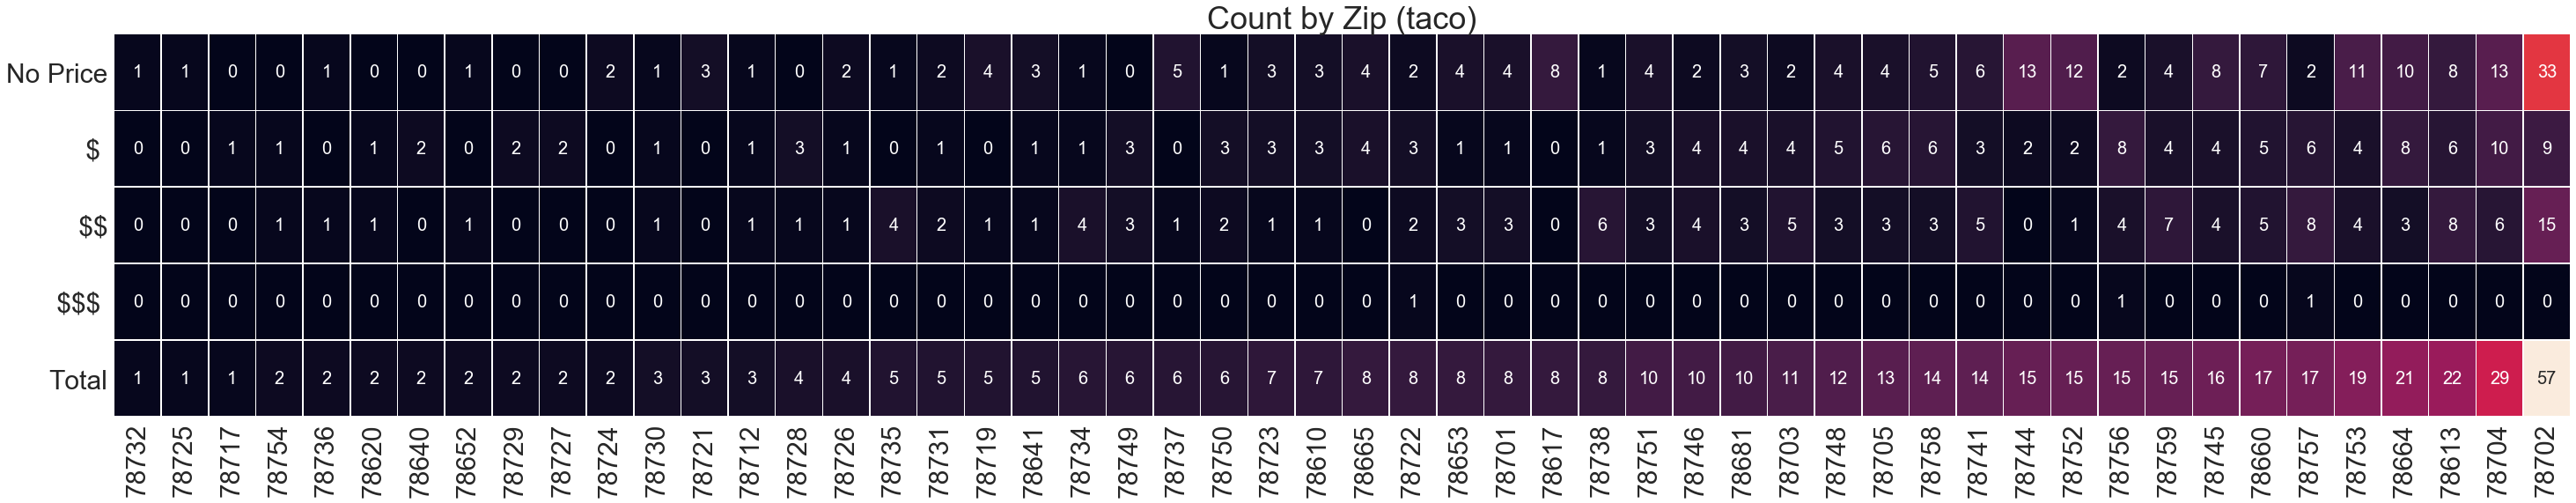

In [20]:
sns.set(font_scale=3)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 8))
sns.heatmap(df_new1, annot=True, fmt="d", linewidths=.5, ax=ax, cbar=False, annot_kws={"size":20})
title = "Count by Zip (" + key_word + ")"
# label
plt.yticks(rotation=0)
plt.title(title)
plt.xlabel("")
plt.show()